In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
df['workclass']=df['workclass'].replace('?', np.nan)
df['occupation']=df['occupation'].replace('?', np.nan)
df['native-country']=df['native-country'].replace('?', np.nan)

In [7]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df.dropna(how='any', inplace=True)

In [10]:
df.duplicated().sum()

47

In [11]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
y=df['income']

In [13]:
X=df.drop(['income', 'fnlwgt', 'educational-num', 'marital-status', 'relationship', 'race'], axis=1)

In [14]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
5    <=50K
Name: income, dtype: object

In [15]:
X.head()

,age,workclass,education,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Machine-op-inspct,Male,0,0,40,United-States
1,38,Private,HS-grad,Farming-fishing,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,0,0,40,United-States
3,44,Private,Some-college,Machine-op-inspct,Male,7688,0,40,United-States
5,34,Private,10th,Other-service,Male,0,0,30,United-States


In [16]:
from sklearn.preprocessing import LabelEncoder

In [18]:
y=LabelEncoder().fit_transform(y)
y=pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [19]:
numeric_features=X.select_dtypes('number')
categorical_features=X.select_dtypes('object')
categorical_features

,workclass,education,occupation,gender,native-country
0,Private,11th,Machine-op-inspct,Male,United-States
1,Private,HS-grad,Farming-fishing,Male,United-States
2,Local-gov,Assoc-acdm,Protective-serv,Male,United-States
3,Private,Some-college,Machine-op-inspct,Male,United-States
5,Private,10th,Other-service,Male,United-States
...,...,...,...,...,...
48837,Private,Assoc-acdm,Tech-support,Female,United-States
48838,Private,HS-grad,Machine-op-inspct,Male,United-States
48839,Private,HS-grad,Adm-clerical,Female,United-States
48840,Private,HS-grad,Adm-clerical,Male,United-States


In [20]:
numeric_features

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [21]:
converted_categorical_features=pd.get_dummies(categorical_features)

In [22]:
all_features=[converted_categorical_features, numeric_features]
newX=pd.concat(all_features, axis=1, join='inner')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [40]:
X_train,X_test,y_train,y_test=train_test_split(newX,y,test_size=0.3,random_state=42)

In [41]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
y_pred=model.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
y_test

,0
20084,0
20027,0
39505,1
39534,0
12586,0
...,...
34451,1
21928,0
18106,0
31496,0


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.8247217513083217

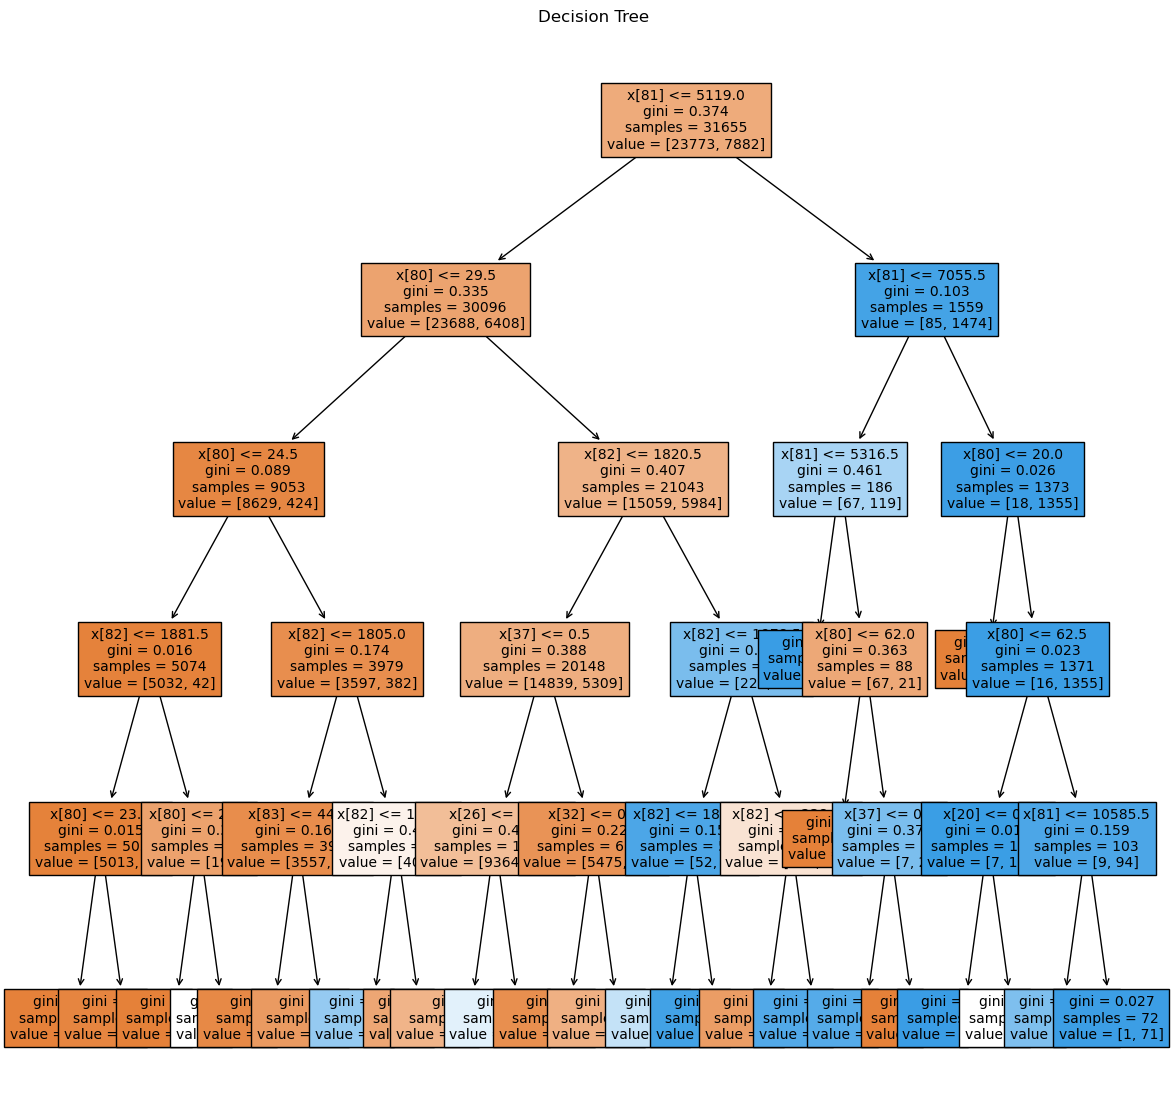

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, fontsize=10, filled=True)
plt.title("Decision Tree")
plt.show()